# 1.Introduction

In [ ]:
This is a 5 layers Sequential Convolutional Neural Network for digits 
recognition trained on MNIST dataset. I choosed to build it with keras API 
(Tensorflow backend) which is very intuitive. Firstly, I will prepare the 
data (handwritten digits images) then i will focus on the CNN modeling and evaluation.

This Notebook follows three main parts:

    *. The data preparation
    *. The CNN modeling and evaluation
    *. The results prediction and submission

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [ ]:
#sudo pip install keras
#git clone https://github.com/keras-team/keras.git


# !What is Keras?
Keras is a minimalist Python library for deep learning that can run on top of Theano or TensorFlow.

It was developed to make implementing deep learning models as fast and easy as possible for research and development.

Modularity: A model can be understood as a sequence or a graph alone. All the concerns of a deep learning model are discrete components that can be combined in arbitrary ways.

Minimalism: The library provides just enough to achieve an outcome, no frills and maximizing readability.

Extensibility: New components are intentionally easy to add and use within the framework, intended for researchers to trial and explore new ideas.

Python: No separate model files with custom file formats. Everything is native Python.

In [5]:
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image  import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white',context='notebook',palette='deep')

# 2. DATA PREPARATIONS

In [6]:
#Load The Data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

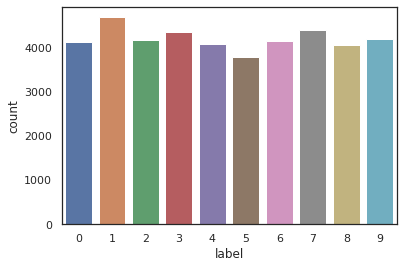

In [7]:
Y_train=train["label"]

#Drop label column
X_train = train.drop(labels = ["label"],axis = 1)

#free some space
del train
g = sns.countplot(Y_train)
Y_train.value_counts()

# Check for Null and missing values 

In [8]:
#check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# Note:
    I check for corrupted images (missing values inside).
    There is no missing values in the train and test 
    dataset. So we can safely go ahead.

# Normalization
We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [10]:
#Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# Reshape

In [11]:
#reshape image in 3 dimensional(height = 28px,width = 28px, canal =1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
'''Train and test images (28px x 28px) has been stock into pandas.
Dataframe as 1D vectors of 784 values.
We reshape all data to 28x28x1 3D matrices.
Keras requires an extra dimension in the end which correspond to channels. 
MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, 
we would have reshaped 784px vectors to 28x28x3 3D matrices. '''

# Label encoding

In [ ]:
#Encode labels to one hot vectors(ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

#Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

# Split training and valdiation set

In [14]:
# Set the random seed
random_seed = 2

In [15]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [ ]:
'''I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

Since we have 42 000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set. Be carefull with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation.

To avoid that, you could use stratify = True option in train_test_split function (Only for >=0.17 sklearn versions).'''

In [ ]:
#We can get a better sense for one of these examples by visualising the image and looking at the label.

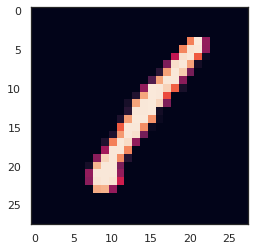

In [12]:
g = plt.imshow(X_train[0][:,:,0])